In [1]:
import pandas as pd
import numpy as np

In [35]:
data_last=pd.read_csv('/home/rliuaj/strategy/data/data_last.csv')
data_cap=pd.read_csv('/home/rliuaj/strategy/data/data_mkt_cap.csv')
data_sector=pd.read_csv('/home/rliuaj/strategy/data/data_sector.csv')
data_volume=pd.read_csv('/home/rliuaj/strategy/data/data_volume.csv')

In [ ]:

df_merged = pd.merge(data_last, data_cap, on=['ticker', 'date'], how='outer')
df_merged = pd.merge(df_merged, data_sector, on='ticker', how='outer')
df_merged = pd.merge(df_merged, data_volume, on=['ticker', 'date'], how='outer')


In [5]:
df_merged

,ticker,date,last,mkt_cap,bics_sector,volume
0,1332 JT,2017-08-16,562.12,199642.95,"Consumer, Non-cyclical",1641300.0
1,1332 JT,2017-08-17,560.36,199018.09,"Consumer, Non-cyclical",1247700.0
2,1332 JT,2017-08-18,553.32,196518.64,"Consumer, Non-cyclical",1505800.0
3,1332 JT,2017-08-21,544.53,193394.34,"Consumer, Non-cyclical",2046200.0
4,1332 JT,2017-08-22,535.73,190270.04,"Consumer, Non-cyclical",2409300.0
...,...,...,...,...,...,...
420532,9984 JT,2024-02-29,8790.00,12921258.07,Communications,10544100.0
420533,9984 JT,2024-03-01,8907.00,13093247.51,Communications,12555200.0
420534,9984 JT,2024-03-04,8934.00,13132937.38,Communications,12317400.0
420535,9984 JT,2024-03-05,9008.00,13241717.03,Communications,10072900.0


In [ ]:
import pandas as pd


# Sort the DataFrame by 'ticker' and 'date' to ensure the data is in the right order
df_merged.sort_values(['ticker', 'date'], inplace=True)

# Calculate the daily return for each ticker
df_merged['y'] = df_merged.groupby('ticker')['last'].pct_change()
df_merged.dropna(subset=['y'], inplace=True)
df_merged['return_lag1'] = df_merged.groupby('ticker')['y'].shift(1)

df_merged.dropna(subset=['return_lag1'], inplace=True)
df_merged


/tmp/ipykernel_828420/1775237286.py:9: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_merged['y'] = df_merged.groupby('ticker')['last'].pct_change()


,ticker,date,last,mkt_cap,bics_sector,volume,y,return_lag1
2,1332 JT,2017-08-18,553.32,196518.64,"Consumer, Non-cyclical",1505800.0,-0.012563,-0.003131
3,1332 JT,2017-08-21,544.53,193394.34,"Consumer, Non-cyclical",2046200.0,-0.015886,-0.012563
4,1332 JT,2017-08-22,535.73,190270.04,"Consumer, Non-cyclical",2409300.0,-0.016161,-0.015886
5,1332 JT,2017-08-23,544.53,193394.34,"Consumer, Non-cyclical",2825200.0,0.016426,-0.016161
6,1332 JT,2017-08-24,537.49,190894.90,"Consumer, Non-cyclical",1622000.0,-0.012929,0.016426
...,...,...,...,...,...,...,...,...
420532,9984 JT,2024-02-29,8790.00,12921258.07,Communications,10544100.0,-0.014574,-0.008117
420533,9984 JT,2024-03-01,8907.00,13093247.51,Communications,12555200.0,0.013311,-0.014574
420534,9984 JT,2024-03-04,8934.00,13132937.38,Communications,12317400.0,0.003031,0.013311
420535,9984 JT,2024-03-05,9008.00,13241717.03,Communications,10072900.0,0.008283,0.003031


In [ ]:
df_merged['date'] = pd.to_datetime(df_merged['date'])
# Calculate ranks within each day
df_merged['rank_y'] = df_merged.groupby('date')['y'].rank(method='dense')  # Using 'dense' to ensure consecutive ranks
#Normalize ranks from 0 to 1 within each day
df_merged['y1'] = (df_merged['rank_y'] - 1) / (df_merged.groupby('date')['rank_y'].transform('max') - 1)

In [52]:
df_merged

,ticker,date,last,mkt_cap,bics_sector,volume,y,return_lag1,rank_y,y1
2,1332 JT,2017-08-18,553.32,196518.64,"Consumer, Non-cyclical",1505800.0,-0.012563,-0.003131,121.0,0.476190
3,1332 JT,2017-08-21,544.53,193394.34,"Consumer, Non-cyclical",2046200.0,-0.015886,-0.012563,15.0,0.057613
4,1332 JT,2017-08-22,535.73,190270.04,"Consumer, Non-cyclical",2409300.0,-0.016161,-0.015886,5.0,0.016878
5,1332 JT,2017-08-23,544.53,193394.34,"Consumer, Non-cyclical",2825200.0,0.016426,-0.016161,230.0,0.950207
6,1332 JT,2017-08-24,537.49,190894.90,"Consumer, Non-cyclical",1622000.0,-0.012929,0.016426,34.0,0.134694
...,...,...,...,...,...,...,...,...,...,...
420532,9984 JT,2024-02-29,8790.00,12921258.07,Communications,10544100.0,-0.014574,-0.008117,52.0,0.209877
420533,9984 JT,2024-03-01,8907.00,13093247.51,Communications,12555200.0,0.013311,-0.014574,137.0,0.559671
420534,9984 JT,2024-03-04,8934.00,13132937.38,Communications,12317400.0,0.003031,0.013311,172.0,0.709544
420535,9984 JT,2024-03-05,9008.00,13241717.03,Communications,10072900.0,0.008283,0.003031,176.0,0.720165


In [ ]:
# add index 
df_merged['ma_3'] = df_merged['last'].rolling(3).mean()    # 5 mean
df_merged['ma_10'] = df_merged['last'].rolling(10).mean()  # 20 mean
df_merged['volatility'] = df_merged['return_lag1'].rolling(10).std() * np.sqrt(252)  # vol

In [80]:
df_merged=df_merged.dropna()
df_merged=df_merged.drop(['bics_sector'],axis=1)
df_merged

,ticker,date,last,mkt_cap,volume,y,return_lag1,rank_y,y1,ma_3,ma_10,volatility
11,1332 JT,2017-08-31,544.53,193394.34,1401900.0,-0.009585,0.027952,9.0,0.032520,543.060000,540.832,0.240289
12,1332 JT,2017-09-01,539.25,191519.76,1393400.0,-0.009696,-0.009585,15.0,0.058577,544.526667,539.425,0.243222
13,1332 JT,2017-09-04,535.73,190270.04,1697900.0,-0.006528,-0.009696,168.0,0.676113,539.836667,538.545,0.240395
14,1332 JT,2017-09-05,527.81,187458.17,1735200.0,-0.014784,-0.006528,38.0,0.149798,534.263333,537.753,0.230143
15,1332 JT,2017-09-06,534.85,189957.61,1845300.0,0.013338,-0.014784,218.0,0.882114,532.796667,536.785,0.227784
...,...,...,...,...,...,...,...,...,...,...,...,...
420532,9984 JT,2024-02-29,8790.00,12921258.07,10544100.0,-0.014574,-0.008117,52.0,0.209877,8901.000000,8655.600,0.446069
420533,9984 JT,2024-03-01,8907.00,13093247.51,12555200.0,0.013311,-0.014574,137.0,0.559671,8872.333333,8696.100,0.408365
420534,9984 JT,2024-03-04,8934.00,13132937.38,12317400.0,0.003031,0.013311,172.0,0.709544,8877.000000,8758.000,0.378434
420535,9984 JT,2024-03-05,9008.00,13241717.03,10072900.0,0.008283,0.003031,176.0,0.720165,8949.666667,8804.000,0.348253


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt


def prepare_data(df):

    df = df.copy()
    
    numeric_features = ['last', 'mkt_cap', 'volume', 'return_lag1', 'ma_3', 'ma_10', 'volatility']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features)#,
            #('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])
    
    processed_data = preprocessor.fit_transform(df)
    
    numeric_cols = numeric_features
    feature_columns = np.concatenate([numeric_cols])#, cat_cols])
    
    processed_df = pd.DataFrame(processed_data, columns=feature_columns, index=df.index)
    
    processed_df = pd.concat([
        df[['ticker', 'date', 'y1']],
        processed_df
    ], axis=1)
    
    return processed_df, feature_columns, preprocessor


class FinancialDataset(Dataset):
    def __init__(self, df, feature_columns, sequence_length=5):
        self.sequence_length = sequence_length
        self.feature_columns = feature_columns
        
        df = df.sort_values(['ticker', 'date'])
        
        self.sequences = []
        self.targets = []
        
        for ticker, group in df.groupby('ticker'):
            features = group[feature_columns].values.astype(np.float32)
            targets = group['y1'].values.astype(np.float32)
            
            for i in range(len(features) - sequence_length + 1):
                self.sequences.append(features[i:i+sequence_length])
                self.targets.append(targets[i+sequence_length-1])
        
        print(f"Generated {len(self.sequences)} sequences")
        
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, idx):
        return (
            torch.FloatTensor(self.sequences[idx]),
            torch.FloatTensor([self.targets[idx]])
        )

# LSTM
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=0.2 if num_layers > 1 else 0
        )
        self.regressor = nn.Sequential(
            nn.Linear(hidden_size, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        lstm_out, _ = self.lstm(x)  # [batch, seq_len, hidden_size]
        return self.regressor(lstm_out[:, -1, :])  

# Transformer
class TransformerModel(nn.Module):
    def __init__(self, input_size, d_model=64, nhead=4, num_layers=2):
        super().__init__()
        self.input_proj = nn.Linear(input_size, d_model)
        
        self.encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=d_model*4,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers)
        
        self.regressor = nn.Sequential(
            nn.Linear(d_model, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        x = self.input_proj(x)
        encoded = self.transformer_encoder(x)
        return self.regressor(encoded[:, -1, :])

# train
def train_model(model, train_loader, valid_loader, config):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    criterion = nn.MSELoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=config['lr'])
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, 
        factor=0.5, 
        patience=3,
        verbose=True
    )
    
    best_loss = float('inf')
    history = {'train': [], 'valid': []}
    
    for epoch in range(config['epochs']):
        model.train()
        train_loss = []
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            
            optimizer.zero_grad()
            outputs = model(X)
            loss = criterion(outputs, y)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            
            train_loss.append(loss.item())
        
        avg_train_loss = np.mean(train_loss)
        history['train'].append(avg_train_loss)
        
        model.eval()
        valid_loss = []
        with torch.no_grad():
            for X, y in valid_loader:
                X, y = X.to(device), y.to(device)
                outputs = model(X)
                valid_loss.append(criterion(outputs, y).item())
        
        avg_valid_loss = np.mean(valid_loss)
        history['valid'].append(avg_valid_loss)
        scheduler.step(avg_valid_loss)
        
        if avg_valid_loss < best_loss:
            best_loss = avg_valid_loss
            torch.save(model.state_dict(), 'best_model.pth')
            
        print(f"Epoch {epoch+1}/{config['epochs']} | "
              f"Train Loss: {avg_train_loss:.4f} | "
              f"Valid Loss: {avg_valid_loss:.4f}")
    
    return history

Train Date Range: 2017-08-18 00:00:00 to 2021-07-30 00:00:00
Valid Date Range: 2021-08-02 00:00:00 to 2022-11-17 00:00:00
Test Date Range: 2022-11-18 00:00:00 to 2024-03-06 00:00:00
Train size: 250274, Valid size: 83248, Test size: 83634
Generated 249230 sequences
Generated 82196 sequences
Generated 82582 sequences


/opt/anaconda3/envs/tabllm/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1/5 | Train Loss: 0.0843 | Valid Loss: 0.0826
Epoch 2/5 | Train Loss: 0.0709 | Valid Loss: 0.0471
Epoch 3/5 | Train Loss: 0.0509 | Valid Loss: 0.0442
Epoch 4/5 | Train Loss: 0.0489 | Valid Loss: 0.0447
Epoch 5/5 | Train Loss: 0.0483 | Valid Loss: 0.0452


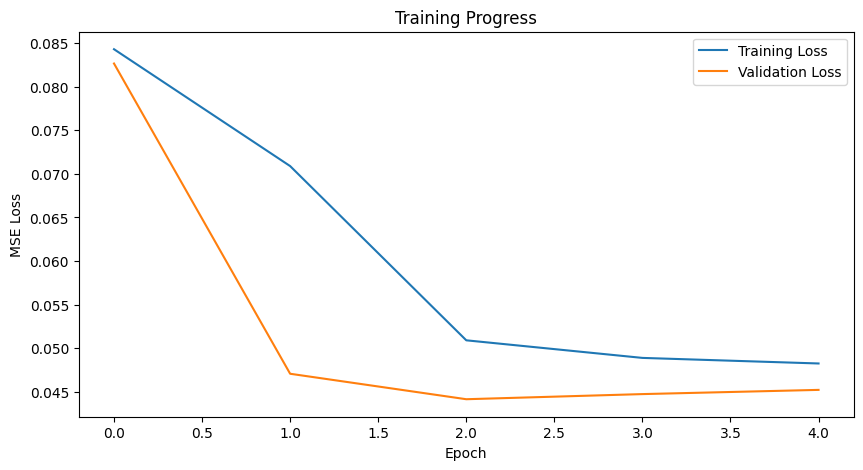

In [ ]:
# main
if __name__ == "__main__":
    df = df_merged
    df['date'] = pd.to_datetime(df['date'])

    processed_df, feature_columns, preprocessor = prepare_data(df)

    # Define the quantiles for splitting
    train_end = processed_df['date'].quantile(0.6)
    valid_end = processed_df['date'].quantile(0.8)  # 0.5 (train) + 0.2 (valid) = 0.7

    train_df = processed_df[processed_df['date'] < train_end]
    valid_df = processed_df[(processed_df['date'] >= train_end) & (processed_df['date'] < valid_end)]
    test_df = processed_df[processed_df['date'] >= valid_end]

    print(f"Train Date Range: {train_df['date'].min()} to {train_df['date'].max()}")
    print(f"Valid Date Range: {valid_df['date'].min()} to {valid_df['date'].max()}")
    print(f"Test Date Range: {test_df['date'].min()} to {test_df['date'].max()}")
    print(f"Train size: {len(train_df)}, Valid size: {len(valid_df)}, Test size: {len(test_df)}")
    
    train_dataset = FinancialDataset(train_df, feature_columns)
    valid_dataset = FinancialDataset(valid_df, feature_columns)
    test_dataset = FinancialDataset(test_df, feature_columns)
    
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    config = {
        'model_type': 'lstm',  # 可选 'lstm' 或 'transformer'
        'input_size': len(feature_columns),
        'hidden_size': 64,
        'num_layers': 2,
        'epochs': 5,
        'lr': 0.001,
        'patience': 3
    }
    
    if config['model_type'] == 'lstm':
        model = LSTMModel(
            input_size=config['input_size'],
            hidden_size=config['hidden_size'],
            num_layers=config['num_layers']
        )
    else:
        model = TransformerModel(
            input_size=config['input_size'],
            d_model=config['hidden_size'],
            nhead=4,
            num_layers=config['num_layers']
        )
    
    # train
    history = train_model(model, train_loader, valid_loader, config)
    
    plt.figure(figsize=(10, 5))
    plt.plot(history['train'], label='Training Loss')
    plt.plot(history['valid'], label='Validation Loss')
    plt.title('Training Progress')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.show()

In [58]:
test_df

,ticker,date,y1,last,mkt_cap,volume,return_lag1,ma_3,ma_10,volatility,bics_sector_Basic Materials,bics_sector_Communications,"bics_sector_Consumer, Cyclical","bics_sector_Consumer, Non-cyclical",bics_sector_Energy,bics_sector_Financial,bics_sector_Industrial,bics_sector_Technology,bics_sector_Utilities
1281,1332 JT,2022-11-18,0.653061,-0.494304,-0.585272,-0.151348,0.591110,-0.495301,-0.496574,1.247538,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1282,1332 JT,2022-11-21,0.648760,-0.493578,-0.584840,-0.206639,0.280218,-0.494513,-0.496301,-1.044175,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1283,1332 JT,2022-11-22,0.554167,-0.492486,-0.584193,-0.196277,0.378366,-0.493725,-0.495973,-1.024369,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1284,1332 JT,2022-11-24,0.458678,-0.491760,-0.583761,-0.190806,0.576671,-0.492877,-0.495554,-0.974186,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1285,1332 JT,2022-11-25,0.763485,-0.491032,-0.583329,-0.205194,0.370662,-0.492027,-0.495062,-0.992135,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420532,9984 JT,2024-02-29,0.209877,1.061574,3.822618,0.541908,-0.444492,1.083002,1.038498,1.186828,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420533,9984 JT,2024-03-01,0.559671,1.083525,3.882027,0.706131,-0.778566,1.077621,1.046112,0.937621,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420534,9984 JT,2024-03-04,0.709544,1.088591,3.895736,0.686713,0.664228,1.078497,1.057749,0.739786,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420535,9984 JT,2024-03-05,0.720165,1.102474,3.933311,0.503430,0.132362,1.092138,1.066397,0.540299,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# data loader
train_dataset = FinancialDataset(train_df, feature_columns)
valid_dataset = FinancialDataset(valid_df, feature_columns)
test_dataset = FinancialDataset(test_df, feature_columns)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Generated 249230 sequences
Generated 82196 sequences
Generated 82582 sequences


In [ ]:
def make_predictions(model, test_df, preprocessor, feature_columns, sequence_length=5):
    """
    Generate predictions on the test set.
    :param model: Trained model.
    :param test_df: Original test DataFrame.
    :param preprocessor: Preprocessing pipeline.
    :param feature_columns: List of feature column names after preprocessing.
    :param sequence_length: Length of the time window.
    :return: DataFrame with predictions.
    """
    test_df = test_df.copy()

    processed_data = preprocessor.transform(test_df)
    processed_test = pd.DataFrame(
        processed_data,
        columns=feature_columns,  # Ensure these are the correct updated column names after preprocessing
        index=test_df.index
    )

    processed_test = pd.concat([
        test_df[['ticker', 'date']],
        processed_test
    ], axis=1)

    predictions = []
    prediction_dates = []
    prediction_tickers = []

    # Process by group of ticker
    for ticker, group in processed_test.groupby('ticker'):
        group = group.sort_values('date')
        if len(group) < sequence_length:
            continue  # Skip groups smaller than the sequence length
        features = group[feature_columns].values.astype(np.float32)
        dates = group['date'].values

        # Generate prediction sequences
        for i in range(sequence_length-1, len(features)):
            seq = features[i-sequence_length+1:i+1]
            with torch.no_grad():
                pred = model(torch.FloatTensor(seq).unsqueeze(0))

            predictions.append(pred.item())
            prediction_dates.append(dates[i])
            prediction_tickers.append(ticker)

    pred_df = pd.DataFrame({
        'ticker': prediction_tickers,
        'date': prediction_dates,
        'prediction': predictions
    })

    final_test_df = pd.merge(
        test_df,
        pred_df,
        on=['ticker', 'date'],
        how='left'
    )


    final_test_df['prediction'] = final_test_df.groupby('ticker')['prediction'].ffill()
    # Fill remaining missing values with 0
    #final_test_df['prediction'] = final_test_df['prediction'].fillna(0)

    return final_test_df


In [ ]:
import torch

def make_predictions(model, test_df, preprocessor, feature_columns, sequence_length=5, device='cuda'):
    """
    Generate predictions on the test set.
    :param model: Trained model.
    :param test_df: Original test DataFrame.
    :param preprocessor: Preprocessing pipeline.
    :param feature_columns: List of feature column names after preprocessing.
    :param sequence_length: Length of the time window.
    :param device: The device ('cuda' or 'cpu') to perform computations.
    :return: DataFrame with predictions.
    """
    model.eval()
    model.to(device)

    test_df = test_df.copy()

    # Transform test data using the preprocessor (do not refit!)
    processed_data = preprocessor.transform(test_df)
    processed_test = pd.DataFrame(
        processed_data,
        columns=feature_columns,  # Ensure these are the correct updated column names after preprocessing
        index=test_df.index
    )

    # Merge necessary columns
    processed_test = pd.concat([
        test_df[['ticker', 'date']],
        processed_test
    ], axis=1)

    predictions = []
    prediction_dates = []
    prediction_tickers = []

    # Process by group of ticker
    for ticker, group in processed_test.groupby('ticker'):
        group = group.sort_values('date')
        if len(group) < sequence_length:
            continue  
        features = group[feature_columns].values.astype(np.float32)

        features = torch.tensor(features, dtype=torch.float32).to(device)

        dates = group['date'].values

        # Generate prediction sequences
        for i in range(sequence_length-1, len(features)):
            seq = features[i-sequence_length+1:i+1]
            with torch.no_grad():
                pred = model(seq.unsqueeze(0))  

            predictions.append(pred.item())
            prediction_dates.append(dates[i])
            prediction_tickers.append(ticker)

    pred_df = pd.DataFrame({
        'ticker': prediction_tickers,
        'date': prediction_dates,
        'prediction': predictions
    })

    final_test_df = pd.merge(
        test_df,
        pred_df,
        on=['ticker', 'date'],
        how='left'
    )


    final_test_df['prediction'] = final_test_df.groupby('ticker')['prediction'].ffill()


    return final_test_df

final_test_df = make_predictions(
    model=model,
    test_df=test_df,
    preprocessor=preprocessor,
    feature_columns=feature_columns,
    device='cuda'  # Adjust this to 'cpu' if necessary
)


In [101]:
final_test_df

,ticker,date,y1,last,mkt_cap,volume,return_lag1,ma_3,ma_10,volatility,prediction
0,1332 JT,2022-11-18,0.653061,-0.494304,-0.585272,-0.151348,0.591110,-0.495301,-0.496574,1.247538,NaN
1,1332 JT,2022-11-21,0.648760,-0.493578,-0.584840,-0.206639,0.280218,-0.494513,-0.496301,-1.044175,NaN
2,1332 JT,2022-11-22,0.554167,-0.492486,-0.584193,-0.196277,0.378366,-0.493725,-0.495973,-1.024369,NaN
3,1332 JT,2022-11-24,0.458678,-0.491760,-0.583761,-0.190806,0.576671,-0.492877,-0.495554,-0.974186,NaN
4,1332 JT,2022-11-25,0.763485,-0.491032,-0.583329,-0.205194,0.370662,-0.492027,-0.495062,-0.992135,0.558480
...,...,...,...,...,...,...,...,...,...,...,...
83629,9984 JT,2024-02-29,0.209877,1.061574,3.822618,0.541908,-0.444492,1.083002,1.038498,1.186828,0.326648
83630,9984 JT,2024-03-01,0.559671,1.083525,3.882027,0.706131,-0.778566,1.077621,1.046112,0.937621,0.454611
83631,9984 JT,2024-03-04,0.709544,1.088591,3.895736,0.686713,0.664228,1.078497,1.057749,0.739786,0.405558
83632,9984 JT,2024-03-05,0.720165,1.102474,3.933311,0.503430,0.132362,1.092138,1.066397,0.540299,0.518318


In [103]:
final_test_df=final_test_df.dropna()

In [109]:
final_test_df['factor']=final_test_df['prediction']
final_test_df=final_test_df[['ticker','date','factor']]

In [110]:
final_test_df

,ticker,date,factor
4,1332 JT,2022-11-25,0.558480
5,1332 JT,2022-11-28,0.505598
6,1332 JT,2022-11-29,0.388139
7,1332 JT,2022-11-30,0.453236
8,1332 JT,2022-12-01,0.493084
...,...,...,...
83629,9984 JT,2024-02-29,0.326648
83630,9984 JT,2024-03-01,0.454611
83631,9984 JT,2024-03-04,0.405558
83632,9984 JT,2024-03-05,0.518318


In [ ]:
#merge
result = pd.merge(final_test_df, df_merged, on=['ticker', 'date'], how='left')
result

,ticker,date,factor,last,mkt_cap,volume,y,return_lag1,rank_y,y1,ma_3,ma_10,volatility
0,1332 JT,2022-11-25,0.558480,514.50,165900.48,1395000.0,0.007599,0.007637,185.0,0.763485,510.623333,498.318,0.116404
1,1332 JT,2022-11-28,0.505598,510.62,164650.76,1308500.0,-0.007541,0.007599,108.0,0.447699,511.913333,500.643,0.114420
2,1332 JT,2022-11-29,0.388139,508.68,164025.90,1218500.0,-0.003799,-0.007541,125.0,0.521008,511.266667,502.580,0.126974
3,1332 JT,2022-11-30,0.453236,505.78,163088.60,1674500.0,-0.005701,-0.003799,86.0,0.355649,508.360000,503.743,0.134019
4,1332 JT,2022-12-01,0.493084,503.84,162463.74,1298900.0,-0.003836,-0.005701,119.0,0.487603,506.100000,505.293,0.137388
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82577,9984 JT,2024-02-29,0.326648,8790.00,12921258.07,10544100.0,-0.014574,-0.008117,52.0,0.209877,8901.000000,8655.600,0.446069
82578,9984 JT,2024-03-01,0.454611,8907.00,13093247.51,12555200.0,0.013311,-0.014574,137.0,0.559671,8872.333333,8696.100,0.408365
82579,9984 JT,2024-03-04,0.405558,8934.00,13132937.38,12317400.0,0.003031,0.013311,172.0,0.709544,8877.000000,8758.000,0.378434
82580,9984 JT,2024-03-05,0.518318,9008.00,13241717.03,10072900.0,0.008283,0.003031,176.0,0.720165,8949.666667,8804.000,0.348253


In [ ]:
#backtest

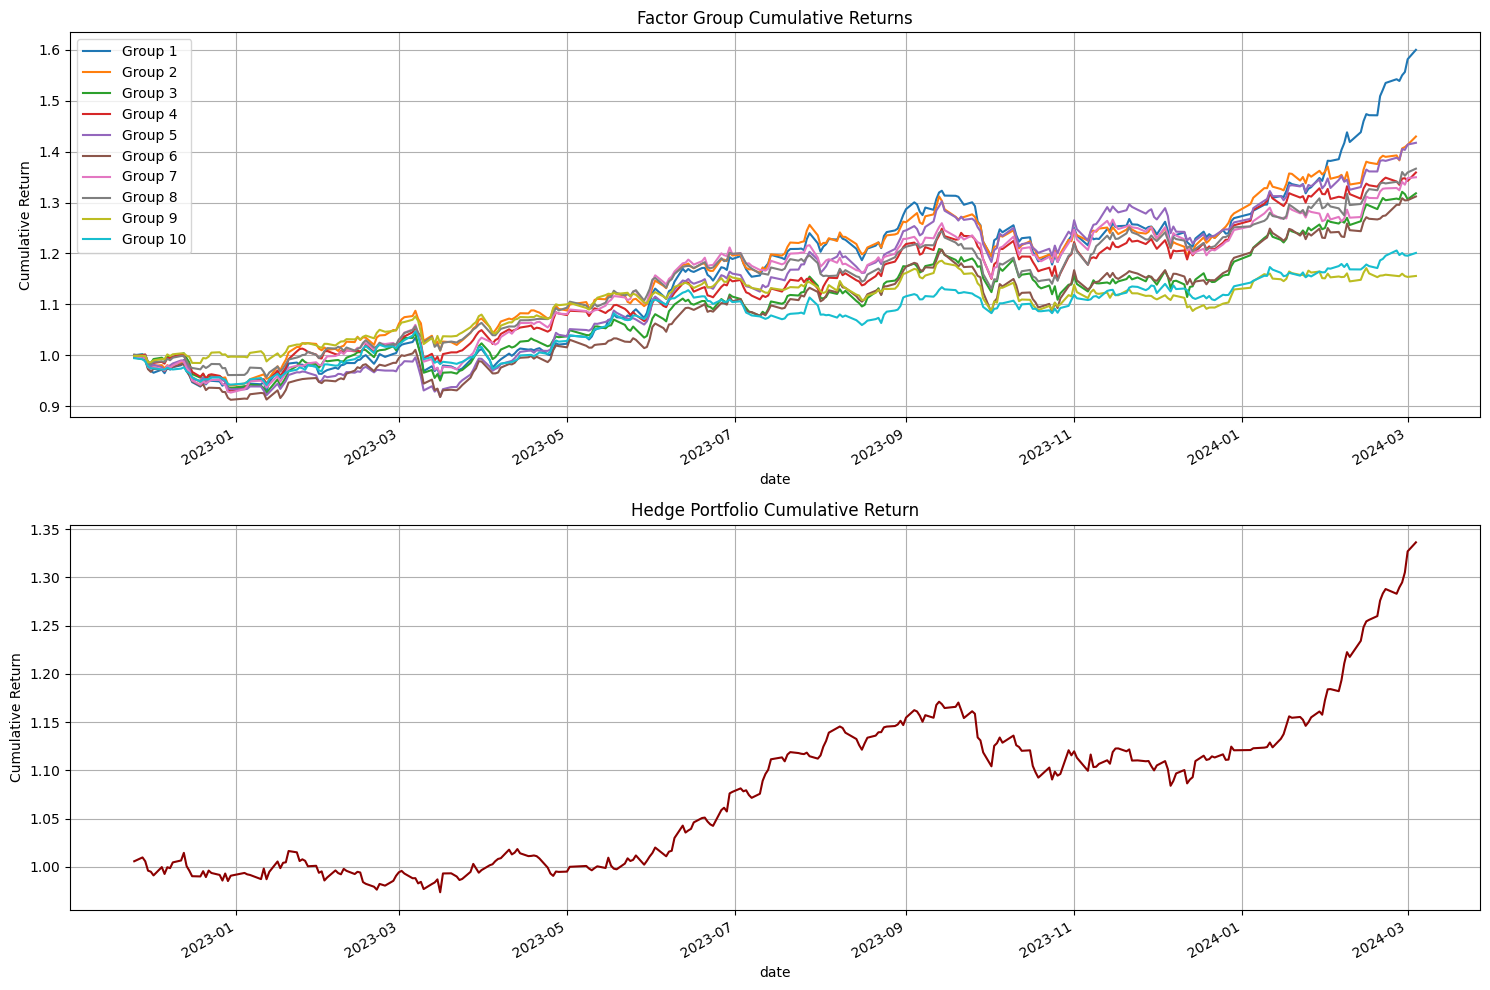

回测结果:
      IC   ICIR  Annual Return  Volatility  Sharpe Ratio  Max Drawdown  \
0 -0.008 -0.075          0.393       0.161         2.437          0.11   

   Hedge Annual Return  Hedge Volatility  Hedge Sharpe Ratio  \
0                0.239             0.101               2.368   

   Hedge Max Drawdown  
0               0.074  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

class FactorBacktester:
    def __init__(self, data):
        """

        :param data: 
            ['ticker', 'date', 'last', 'mkt_cap', 'bics_sector', 'volume', 'factor']
        """
        self.data = data.sort_values(['ticker', 'date']).copy()
        self.pnl = pd.DataFrame()
        self.ic = []
        self.result = pd.DataFrame()
        self._preprocess_data()

    def _preprocess_data(self):

        self.data['next_return'] = self.data.groupby('ticker')['last'].pct_change().shift(-1)
        

        self.data = self.data.dropna(subset=['factor', 'next_return'])

    def run_backtest(self):

        unique_dates = self.data['date'].unique()
        
        for i, date in enumerate(unique_dates[:-1]):
            current_date_data = self.data[self.data['date'] == date]
            next_date = unique_dates[i+1]
            
            next_date_data = self.data[self.data['date'] == next_date][['ticker', 'next_return']]
            merged = pd.merge(current_date_data, next_date_data, on='ticker', suffixes=('', '_next'))
            
            if not merged.empty:
                self._process_daily_data(merged, date)

    def _process_daily_data(self, daily_data, date):
        """处理单日数据"""
        daily_data['group'] = pd.qcut(daily_data['factor'], 10, labels=False, duplicates='drop') + 1
        
        # 
        group_returns = daily_data.groupby('group')['next_return_next'].mean()
        
        pnl_record = pd.DataFrame(group_returns).T
        pnl_record['date'] = date
        pnl_record.set_index('date', inplace=True)
        self.pnl = pd.concat([self.pnl, pnl_record])
        
        # IC
        ic_value = daily_data['factor'].corr(daily_data['next_return_next'])
        self.ic.append(ic_value)

    def analyze_results(self):

        ic_mean = np.mean(self.ic)
        ic_std = np.std(self.ic)
        icir = ic_mean / ic_std if ic_std != 0 else 0
        
        # 分组收益
        self.pnl['hedge'] = self.pnl[1] - self.pnl[10]
        
        # 累积收益
        cumulative_returns = (1 + self.pnl).cumprod()
        
        # 收益曲线
        self._plot_results(cumulative_returns)
        
        # 风险指标
        metrics = self._calculate_metrics(cumulative_returns)
        
        self.result = pd.DataFrame([{
            'IC': round(ic_mean, 3),
            'ICIR': round(icir, 3),
            **metrics['long'],
            **metrics['hedge']
        }])
        
        return self.result

    def _calculate_metrics(self, cumulative_returns):
        # 多头指标
        long_returns = self.pnl[1]
        long_metrics = {
            'Annual Return': round(long_returns.mean() * 252, 3),
            'Volatility': round(long_returns.std() * np.sqrt(252), 3),
            'Sharpe Ratio': round(long_returns.mean() / long_returns.std() * np.sqrt(252), 3),
            'Max Drawdown': round(self._max_drawdown(cumulative_returns[1]), 3)
        }
        
        # 对冲组合指标
        hedge_returns = self.pnl['hedge']
        hedge_metrics = {
            'Hedge Annual Return': round(hedge_returns.mean() * 252, 3),
            'Hedge Volatility': round(hedge_returns.std() * np.sqrt(252), 3),
            'Hedge Sharpe Ratio': round(hedge_returns.mean() / hedge_returns.std() * np.sqrt(252), 3),
            'Hedge Max Drawdown': round(self._max_drawdown(cumulative_returns['hedge']), 3)
        }
        
        return {'long': long_metrics, 'hedge': hedge_metrics}

    def _max_drawdown(self, cumulative_series):
        max_vals = cumulative_series.cummax()
        drawdowns = (max_vals - cumulative_series) / max_vals
        return drawdowns.max()

    def _plot_results(self, cumulative_returns):
        plt.figure(figsize=(15, 10))
        
        # 分组收益图
        ax1 = plt.subplot(211)
        for group in range(1, 11):
            cumulative_returns[group].plot(ax=ax1, label=f'Group {group}')
        ax1.set_title('Factor Group Cumulative Returns')
        ax1.set_ylabel('Cumulative Return')
        ax1.legend()
        ax1.grid(True)
        
        # 对冲组合收益图
        ax2 = plt.subplot(212)
        cumulative_returns['hedge'].plot(ax=ax2, color='darkred')
        ax2.set_title('Hedge Portfolio Cumulative Return')
        ax2.set_ylabel('Cumulative Return')
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()




backtester = FactorBacktester(result)#df_merged)

backtester.run_backtest()

results = backtester.analyze_results()

print("回测结果:")
print(results[['IC', 'ICIR', 
             'Annual Return', 'Volatility', 'Sharpe Ratio', 'Max Drawdown',
             'Hedge Annual Return', 'Hedge Volatility', 
             'Hedge Sharpe Ratio', 'Hedge Max Drawdown']])

